<a href="https://colab.research.google.com/github/LCR2001/AI_Thinking/blob/main/Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/AI-Thinking-Data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1EH1SqwJ8QqFAhAXhp4Xs80aQOOfssre8/AI-Thinking-Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(156)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()
## Pregnancies: 임신 횟수
## Glucose : 포도당 부하 검사 수치
## BloodPressure : 혈압(mm Hg)
## Skin Thickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
## Insulin : 혈청 인슐린(mm U/ml)
## BMI : 체질량 지수
## DiabetesPedigreeFunction : 당뇨 내력 가중치 값
## Age : 나이
## Outcome : 클래스 (0 또는 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  return (accuracy + precision + recall + f1 + roc_auc) / 5

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precise')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
# 혈당, 혈압, 피부두께, 인슐린, BMI가 0인 것이 말이 되지 않음.
# 즉, 누가 결측치(NaN)을 0으로 대체한 것이고, 피부두께와 인슐린에서는 상당한 비율을 차지하고 있음.
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

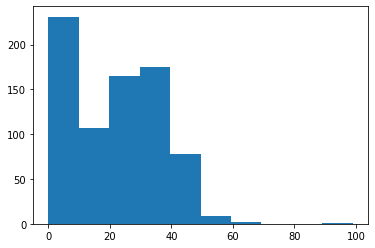

In [ ]:
plt.hist(diabetes_data['SkinThickness'], bins=10) # SkinThickness에서 0의 비율이 데이터 대부분을 차지함.

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

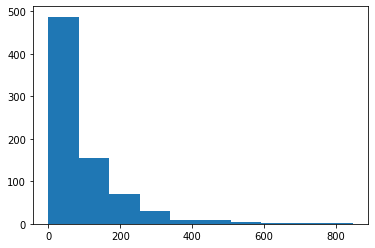

In [ ]:
plt.hist(diabetes_data['Insulin'], bins=10) # Insulin에서 0의의 비율이 데이터 대부분을 차지함.

In [ ]:
# 16page 임계값에 따른 성능지표 출력
from sklearn.preprocessing import Binarizer
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
  metrics_list = []
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    metric = get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print()
    #precision_recall_curve_plot(y_test, pred_proba_c1)
    metrics_list.append(metric)
  return metrics_list

In [ ]:
# => 제대로된 분석이 되지 않으므로, 0 값을 평균으로로 대체.
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [ ]:
# hold_out
print("hold out", end = "\n\n")
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]
metrics_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
pred = lr_clf.predict(X_test_scaled)
pred_proba = lr_clf.predict_proba(X_test_scaled)[:,1]

metrics_list = get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds)

hold out

임곗값:  0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율:0.7963, F1:0.6615, AUC:0.8433

임곗값:  0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율:0.7778, F1:0.6774, AUC:0.8433

임곗값:  0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율:0.7222, F1:0.6667, AUC:0.8433

임곗값:  0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율:0.7037, F1:0.6667, AUC:0.8433

임곗값:  0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율:0.6667, F1:0.6792, AUC:0.8433

임곗값:  0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율:0.6667, F1:0.6857, AUC:0.8433

임곗값:  0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율:0.6481, F1:0.6931, AUC:0.8433

임곗값:  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율:0.6111, F1:0.6804, AUC:0.8433



In [ ]:
# hold - out 최적의 임계값으로 설정
# 성능지표 5개를 모두 더한 뒤 평균을 낸 값이 가장 높은 임계값 지정

print("hold out 최적의 임계값 지정", end = "\n\n")
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

# optimize threshold 찾기
max_metric = max(metrics_list)
max_idx = metrics_list.index(max_metric)
optimize_threshold = thresholds[max_idx]
binarizer = Binarizer(threshold = optimize_threshold)

# 위에서 구한 predict_proba() 예측확률의 array에서 1에 해당하는 컬럼 값을 대입하여 Binarizer 반환하기
pred_proba = lr_clf.predict_proba(X_test_scaled)[:,1].reshape(-1, 1)
predict = binarizer.transform(pred_proba)
print('임곗값: {0:.2f}'.format(optimize_threshold))
get_clf_eval(y_test, predict, pred_proba)
print()

hold out 최적의 임계값 지정

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율:0.6481, F1:0.6931, AUC:0.8433



In [ ]:
from sklearn.model_selection import StratifiedKFold

print("Stratified K-fold") # 총 24개
skfold = StratifiedKFold(n_splits = 3, shuffle = False)
features = diabetes_data.iloc[:, :-1].values
label = diabetes_data.iloc[:, -1].values
k_fold_metrics_list = []
n_iters = 1

for train_index, test_index in skfold.split(features, label):
  print("K={0}".format(n_iters))
  n_iters+=1
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  lr_clf = LogisticRegression()
  lr_clf.fit(X_train_scaled, y_train)
  pred = lr_clf.predict(X_test_scaled)
  pred_proba = lr_clf.predict_proba(X_test_scaled)[:,1]

  k_fold_metrics_list.append(get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds))
  print("-------------------------------------------------------------")


Stratified K-fold
K=1
임곗값:  0.3
오차 행렬
[[114  52]
 [ 20  70]]
정확도: 0.7188, 정밀도: 0.5738, 재현율:0.7778, F1:0.6604, AUC:0.8186

임곗값:  0.33
오차 행렬
[[118  48]
 [ 24  66]]
정확도: 0.7188, 정밀도: 0.5789, 재현율:0.7333, F1:0.6471, AUC:0.8186

임곗값:  0.36
오차 행렬
[[122  44]
 [ 26  64]]
정확도: 0.7266, 정밀도: 0.5926, 재현율:0.7111, F1:0.6465, AUC:0.8186

임곗값:  0.39
오차 행렬
[[128  38]
 [ 31  59]]
정확도: 0.7305, 정밀도: 0.6082, 재현율:0.6556, F1:0.6310, AUC:0.8186

임곗값:  0.42
오차 행렬
[[132  34]
 [ 32  58]]
정확도: 0.7422, 정밀도: 0.6304, 재현율:0.6444, F1:0.6374, AUC:0.8186

임곗값:  0.45
오차 행렬
[[134  32]
 [ 32  58]]
정확도: 0.7500, 정밀도: 0.6444, 재현율:0.6444, F1:0.6444, AUC:0.8186

임곗값:  0.48
오차 행렬
[[139  27]
 [ 35  55]]
정확도: 0.7578, 정밀도: 0.6707, 재현율:0.6111, F1:0.6395, AUC:0.8186

임곗값:  0.5
오차 행렬
[[143  23]
 [ 35  55]]
정확도: 0.7734, 정밀도: 0.7051, 재현율:0.6111, F1:0.6548, AUC:0.8186

-------------------------------------------------------------
K=2
임곗값:  0.3
오차 행렬
[[120  47]
 [ 24  65]]
정확도: 0.7227, 정밀도: 0.5804, 재현율:0.7303, F1:0.6468, AUC:0.8165

임곗값:  

In [ ]:
# k-fold 최적의 임계값으로 설정
# 성능지표 5개를 모두 더한 뒤 평균을 낸 값이 가장 높은 임계값 지정

from sklearn.model_selection import StratifiedKFold
import numpy as np
n_iters = 1
print("Stratified K-fold 최적의 임계값 설정", end = "\n\n") # 총 24개
skfold = StratifiedKFold(n_splits = 3, shuffle = False)
features = diabetes_data.iloc[:, :-1].values
label = diabetes_data.iloc[:, -1].values

# optimize threshold 찾기
k1 = np.array(k_fold_metrics_list[0]).reshape(1, -1)
k2 = np.array(k_fold_metrics_list[1]).reshape(1, -1)
k3 = np.array(k_fold_metrics_list[2]).reshape(1, -1)
  
metrics_array = np.concatenate([k1, k2, k3], axis = 0)
metrics_array
sum_metrics_array = np.sum(metrics_array, axis = 0)
average_metrics_array = sum_metrics_array / 3.0
max_metric = max(average_metrics_array)
max_idx = int(np.where(average_metrics_array == max_metric)[0])
optimize_threshold = thresholds[max_idx]
binarizer = Binarizer(threshold = optimize_threshold)

for train_index, test_index in skfold.split(features, label):
  print("임계값 = {}".format(optimize_threshold))
  print("K={0}".format(n_iters))
  n_iters+=1
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  lr_clf = LogisticRegression()
  lr_clf.fit(X_train_scaled, y_train)
  pred_proba = lr_clf.predict_proba(X_test_scaled)[:,1].reshape(-1, 1)
  predict = binarizer.transform(pred_proba)
  get_clf_eval(y_test, predict, pred_proba)
  print()

Stratified K-fold 최적의 임계값 설정

임계값 = 0.3
K=1
오차 행렬
[[114  52]
 [ 20  70]]
정확도: 0.7188, 정밀도: 0.5738, 재현율:0.7778, F1:0.6604, AUC:0.8186

임계값 = 0.3
K=2
오차 행렬
[[120  47]
 [ 24  65]]
정확도: 0.7227, 정밀도: 0.5804, 재현율:0.7303, F1:0.6468, AUC:0.8165

임계값 = 0.3
K=3
오차 행렬
[[123  44]
 [ 15  74]]
정확도: 0.7695, 정밀도: 0.6271, 재현율:0.8315, F1:0.7150, AUC:0.8796

